# load library

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')


# load data

In [20]:
inpo_df = pd.read_csv('preprocessed data/interpolation_df.csv', index_col=0)
inpo_df

,SEX,AGE,AREA,INCOME,SEOUL,GYEONGGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWAN,JEJU
2,F,50대,서울특별시,300만원 미만,3,3,4,3,3,3,3,3,3,4,4
15,F,30대,서울특별시,500이상700만원 미만,3,3,4,3,3,4,3,3,3,4,4
16,F,30대,서울특별시,500이상700만원 미만,4,1,4,3,2,2,2,3,2,3,4
41,M,20대,서울특별시,300이상500만원 미만,5,3,5,4,4,3,4,3,5,4,4
42,M,20대,서울특별시,500이상700만원 미만,2,2,4,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19304,F,50대,서울특별시,300이상500만원 미만,3,2,3,2,2,2,1,2,2,3,4
19317,F,30대,서울특별시,500이상700만원 미만,3,2,4,2,2,2,3,2,2,3,4
19365,M,20대,서울특별시,300만원 미만,2,5,5,5,5,1,5,5,5,5,5
19400,F,60대,서울특별시,300만원 미만,3,3,4,3,3,3,2,4,3,1,4


# preprocessing data

In [21]:
info_df = inpo_df.loc[:,:'INCOME']
info_df

,SEX,AGE,AREA,INCOME
2,F,50대,서울특별시,300만원 미만
15,F,30대,서울특별시,500이상700만원 미만
16,F,30대,서울특별시,500이상700만원 미만
41,M,20대,서울특별시,300이상500만원 미만
42,M,20대,서울특별시,500이상700만원 미만
...,...,...,...,...
19304,F,50대,서울특별시,300이상500만원 미만
19317,F,30대,서울특별시,500이상700만원 미만
19365,M,20대,서울특별시,300만원 미만
19400,F,60대,서울특별시,300만원 미만


# whole data EDA

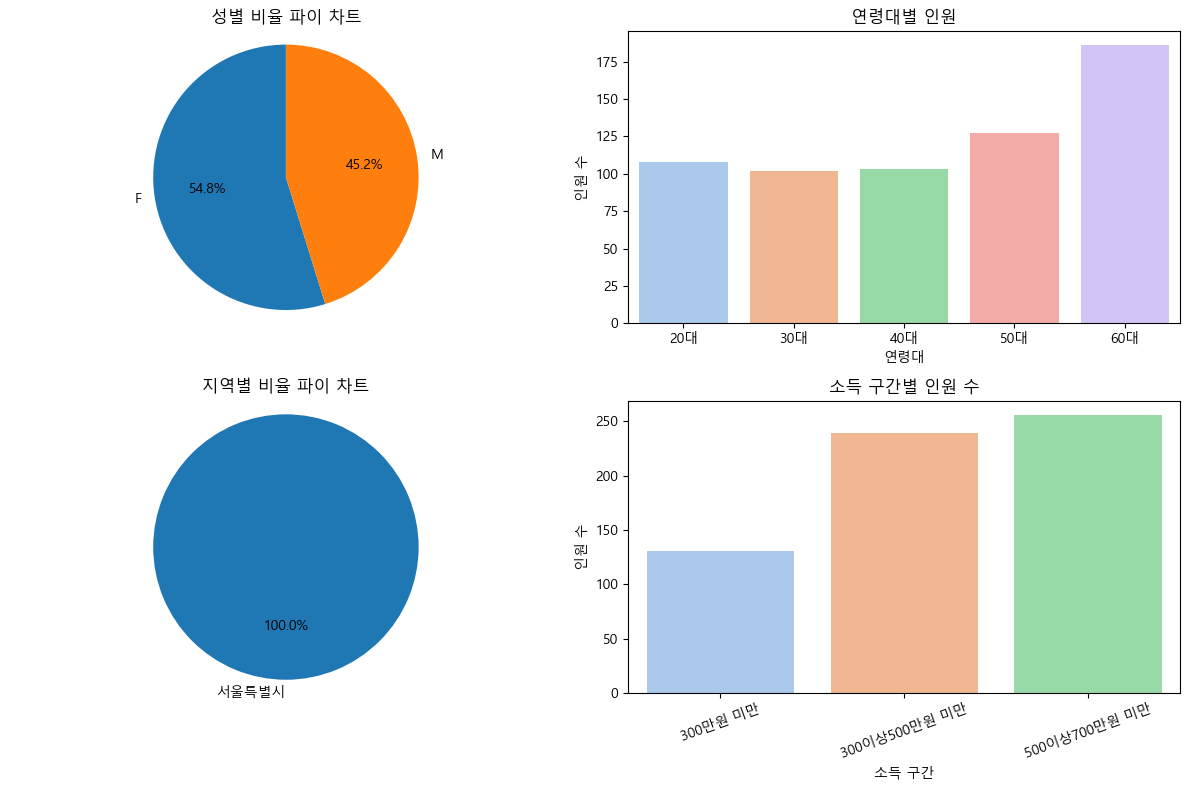

In [22]:
# 1. 성별 인원수 계산 (Pie Chart)
sex_counts = info_df['SEX'].value_counts()
sex_labels = sex_counts.index
sex_sizes = sex_counts.values

# 2. 연령대 인원수 계산 (Bar Plot)
age_counts = info_df['AGE'].value_counts().sort_index()  # 정렬
age_labels = age_counts.index
age_sizes = age_counts.values

# 3. 지역(AREA)별 인원수 계산 (Pie Chart)
area_counts = info_df['AREA'].value_counts()
area_labels = area_counts.index
area_sizes = area_counts.values

# 4. 소득(INCOME)별 인원수 (Countplot)
# (sns.countplot은 따로 value_counts 안 해도 되지만, 정렬이 필요하면 .sort_index() 활용)
# info_df['INCOME']이 카테고리형/문자형이라면 그대로 countplot 사용 가능

# 2x2 subplot 생성
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# [0, 0] 성별 파이 차트
axs[0, 0].pie(sex_sizes, labels=sex_labels, autopct='%.1f%%', startangle=90)
axs[0, 0].axis('equal')
axs[0, 0].set_title("성별 비율 파이 차트")

# [0, 1] 연령대별 Bar Plot
sns.barplot(x=age_labels, y=age_sizes, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title("연령대별 인원")
axs[0, 1].set_ylabel("인원 수")
axs[0, 1].set_xlabel("연령대")

# [1, 0] 지역별 파이 차트
axs[1, 0].pie(area_sizes, labels=area_labels, autopct='%.1f%%', startangle=90)
axs[1, 0].axis('equal')
axs[1, 0].set_title("지역별 비율 파이 차트")

# [1, 1] 소득구간 Countplot
income_order = ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만']
sns.countplot(x='INCOME', data=info_df, ax=axs[1, 1], palette='pastel', order = income_order)
axs[1, 1].set_title("소득 구간별 인원 수")
axs[1, 1].set_xlabel("소득 구간")
axs[1, 1].set_ylabel("인원 수")
axs[1, 1].tick_params(axis='x', rotation=20)

# 자동 레이아웃 조정
plt.tight_layout()
plt.show();


# case by SEX

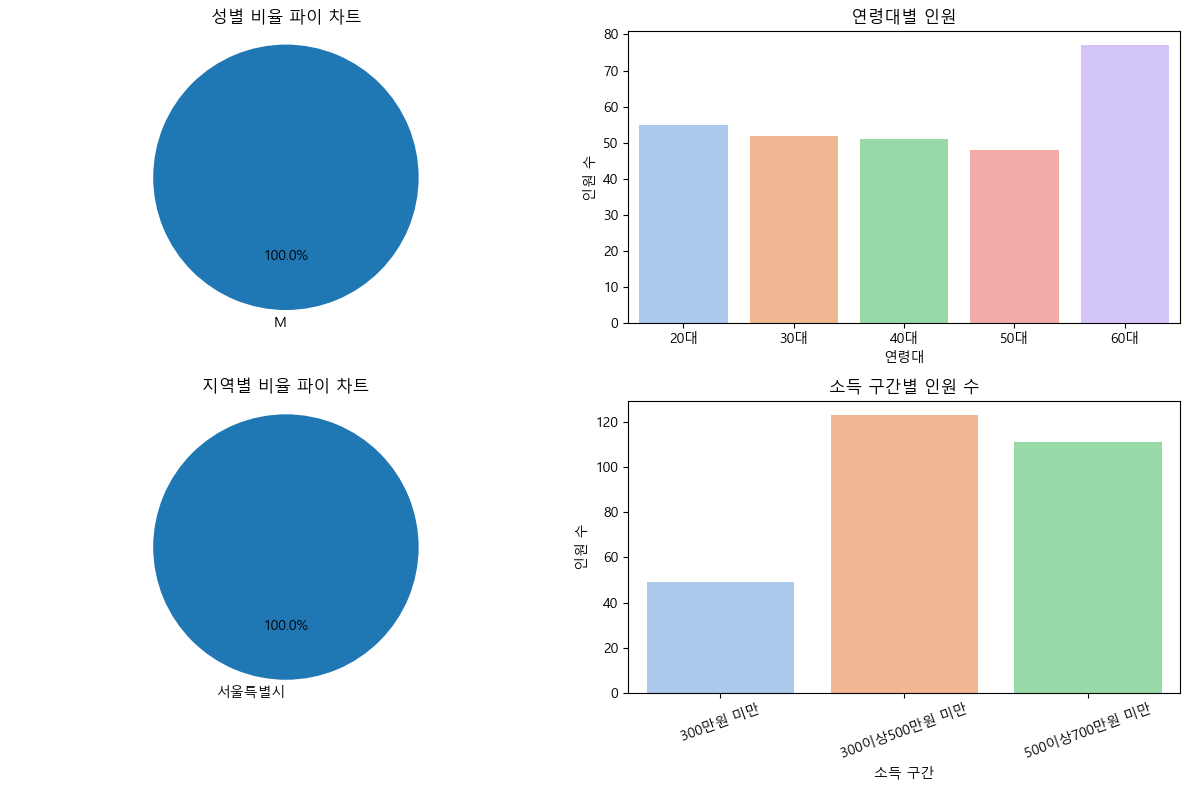

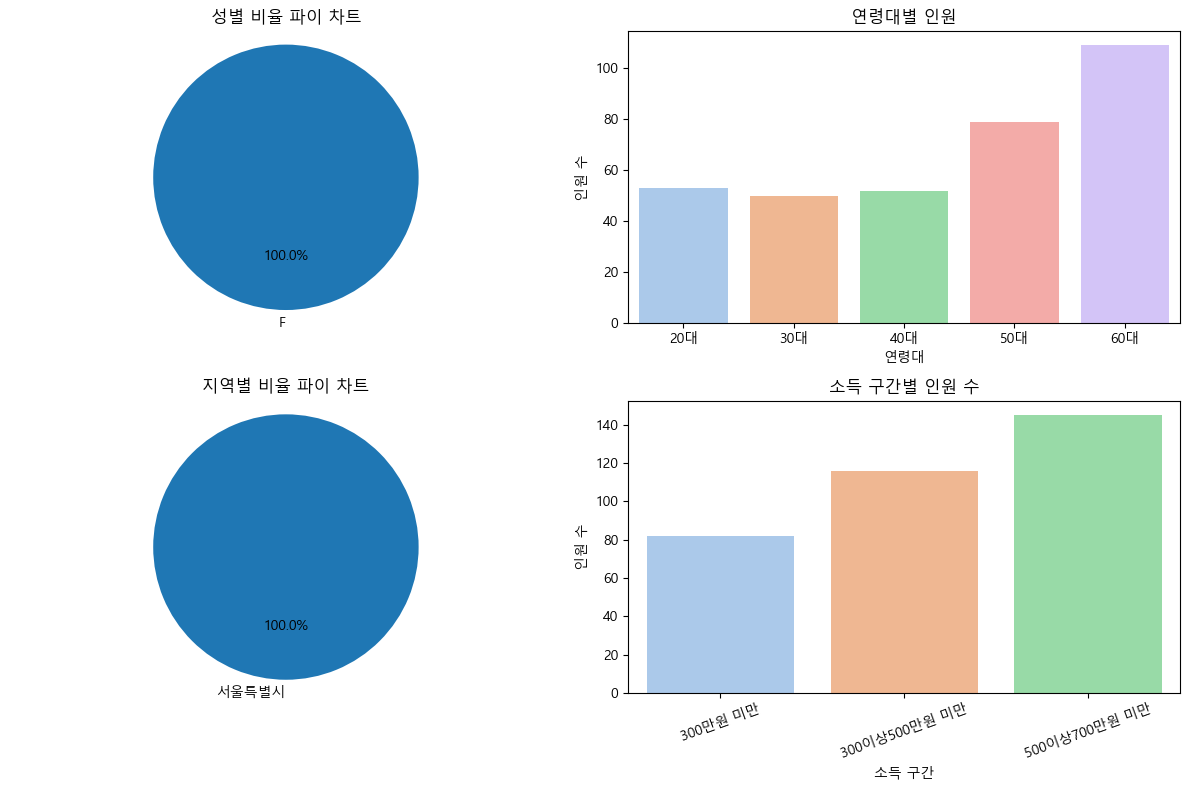

In [23]:
for SEX in ['M','F']:
    # 0. 성별 지정
    grouped_df = info_df[info_df['SEX']==f'{SEX}']

    # 1. 성별 인원수 계산 (Pie Chart)
    sex_counts = grouped_df['SEX'].value_counts()
    sex_labels = sex_counts.index
    sex_sizes = sex_counts.values

    # 2. 연령대 인원수 계산 (Bar Plot)
    age_counts = grouped_df['AGE'].value_counts().sort_index()  # 정렬
    age_labels = age_counts.index
    age_sizes = age_counts.values

    # 3. 지역(AREA)별 인원수 계산 (Pie Chart)
    area_counts = grouped_df['AREA'].value_counts()
    area_labels = area_counts.index
    area_sizes = area_counts.values

    # 4. 소득(INCOME)별 인원수 (Countplot)
    # (sns.countplot은 따로 value_counts 안 해도 되지만, 정렬이 필요하면 .sort_index() 활용)
    # grouped_df['INCOME']이 카테고리형/문자형이라면 그대로 countplot 사용 가능

    # 2x2 subplot 생성
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # [0, 0] 성별 파이 차트
    axs[0, 0].pie(sex_sizes, labels=sex_labels, autopct='%.1f%%', startangle=90)
    axs[0, 0].axis('equal')
    axs[0, 0].set_title("성별 비율 파이 차트")

    # [0, 1] 연령대별 Bar Plot
    sns.barplot(x=age_labels, y=age_sizes, ax=axs[0, 1], palette='pastel')
    axs[0, 1].set_title("연령대별 인원")
    axs[0, 1].set_ylabel("인원 수")
    axs[0, 1].set_xlabel("연령대")

    # [1, 0] 지역별 파이 차트
    axs[1, 0].pie(area_sizes, labels=area_labels, autopct='%.1f%%', startangle=90)
    axs[1, 0].axis('equal')
    axs[1, 0].set_title("지역별 비율 파이 차트")

    # [1, 1] 소득구간 Countplot
    income_order = ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만']
    sns.countplot(x='INCOME', data=grouped_df, ax=axs[1, 1], palette='pastel', order = income_order)
    axs[1, 1].set_title("소득 구간별 인원 수")
    axs[1, 1].set_xlabel("소득 구간")
    axs[1, 1].set_ylabel("인원 수")
    axs[1, 1].tick_params(axis='x', rotation=20)

    # 자동 레이아웃 조정
    plt.tight_layout()
    plt.show();


# case by AGE

In [24]:
info_df['AGE'].unique()

array(['50대', '30대', '20대', '60대', '40대'], dtype=object)

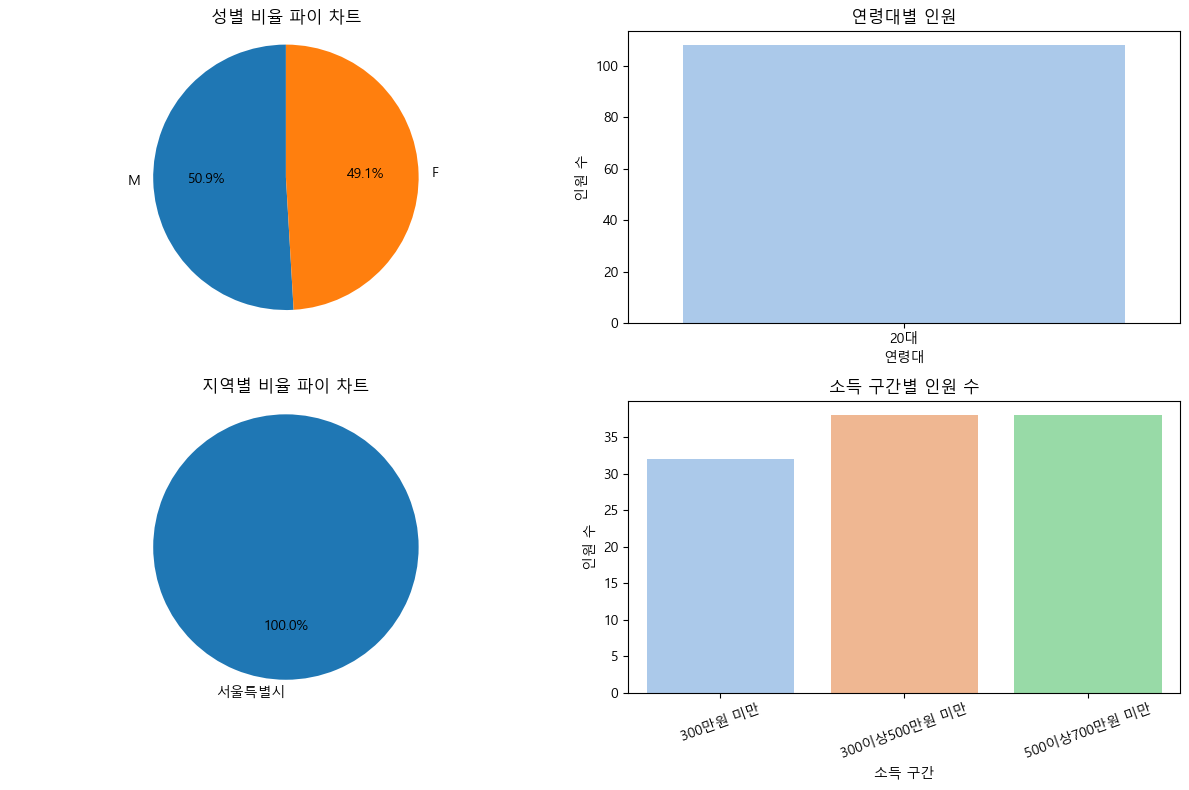

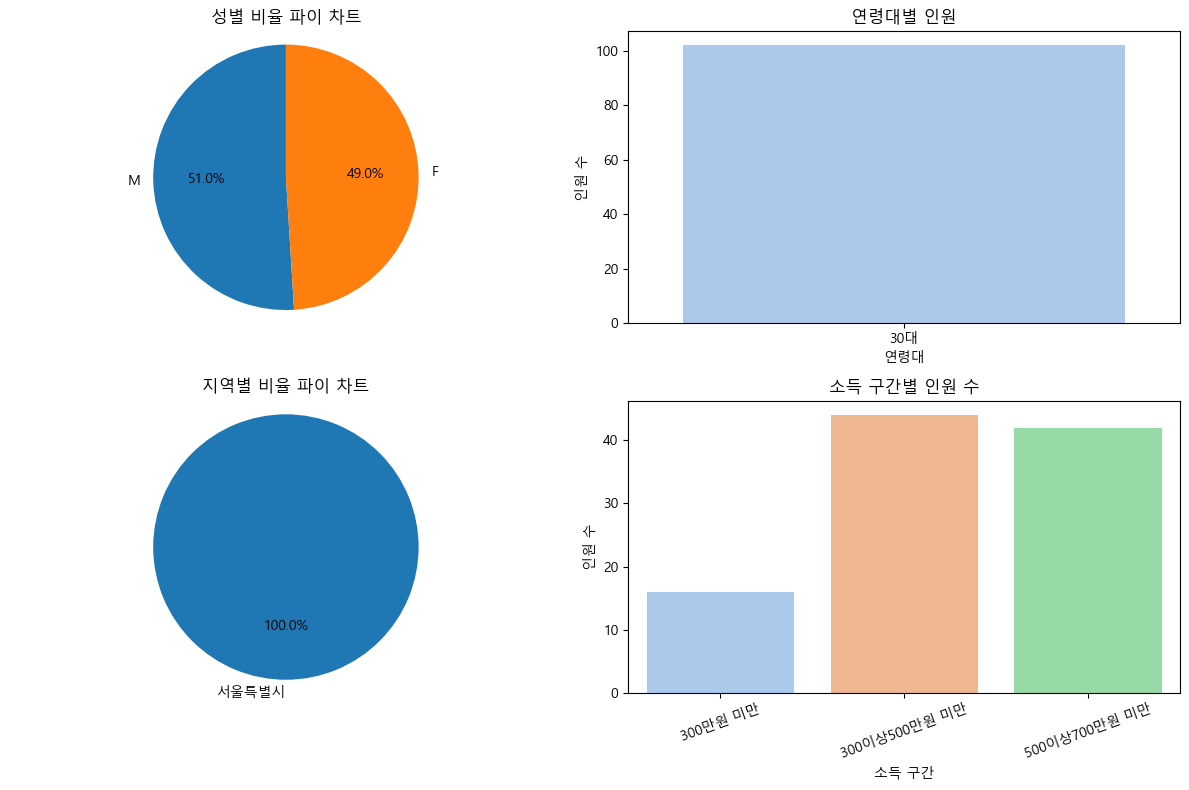

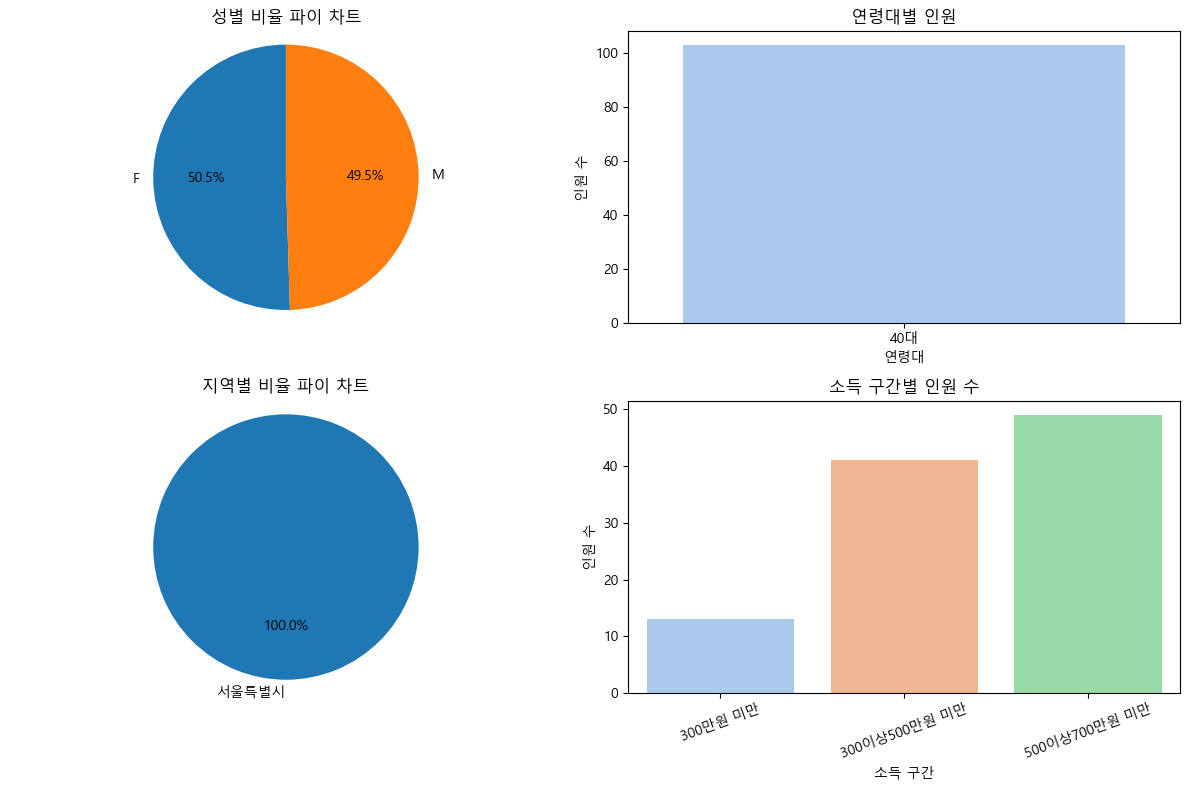

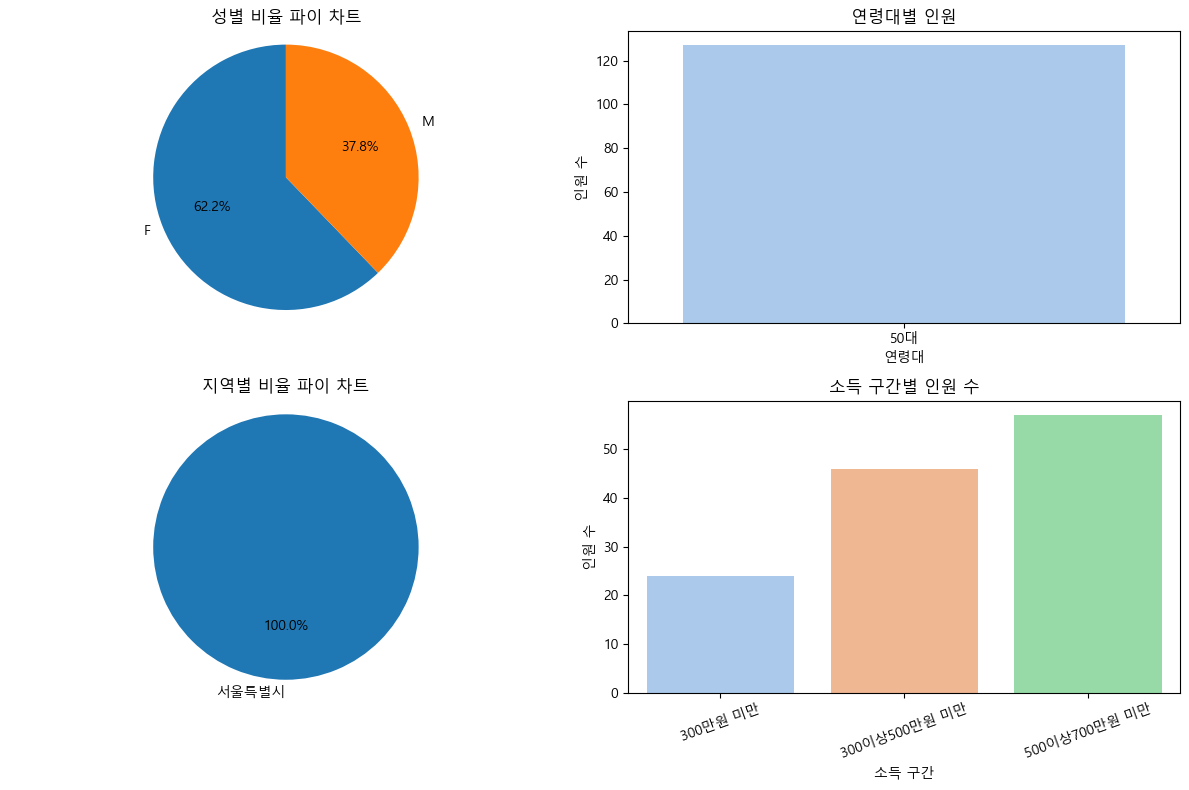

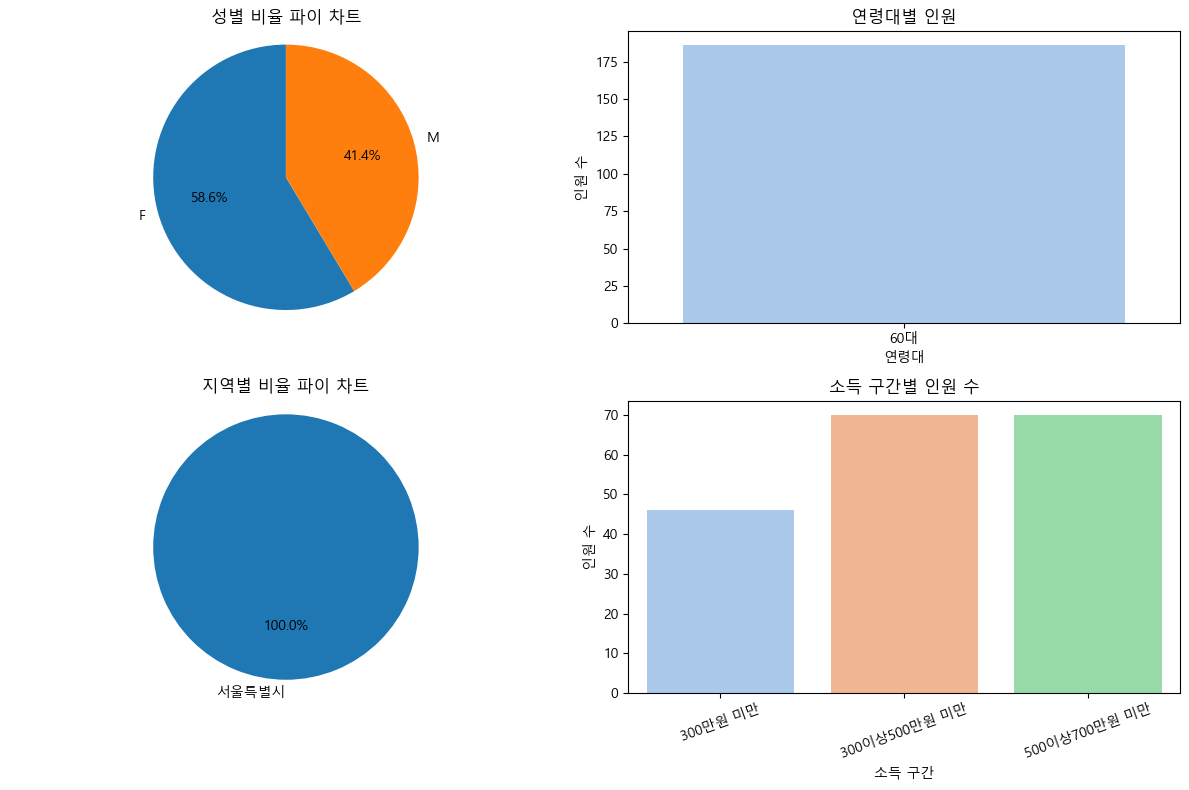

In [25]:
for AGE in [ '20대', '30대', '40대','50대', '60대',]:
    # 0. 성별 지정
    grouped_df = info_df[info_df['AGE']==f'{AGE}']

    # 1. 성별 인원수 계산 (Pie Chart)
    sex_counts = grouped_df['SEX'].value_counts()
    sex_labels = sex_counts.index
    sex_sizes = sex_counts.values

    # 2. 연령대 인원수 계산 (Bar Plot)
    age_counts = grouped_df['AGE'].value_counts().sort_index()  # 정렬
    age_labels = age_counts.index
    age_sizes = age_counts.values

    # 3. 지역(AREA)별 인원수 계산 (Pie Chart)
    area_counts = grouped_df['AREA'].value_counts()
    area_labels = area_counts.index
    area_sizes = area_counts.values

    # 4. 소득(INCOME)별 인원수 (Countplot)
    # (sns.countplot은 따로 value_counts 안 해도 되지만, 정렬이 필요하면 .sort_index() 활용)
    # grouped_df['INCOME']이 카테고리형/문자형이라면 그대로 countplot 사용 가능

    # 2x2 subplot 생성
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # [0, 0] 성별 파이 차트
    axs[0, 0].pie(sex_sizes, labels=sex_labels, autopct='%.1f%%', startangle=90)
    axs[0, 0].axis('equal')
    axs[0, 0].set_title("성별 비율 파이 차트")

    # [0, 1] 연령대별 Bar Plot
    sns.barplot(x=age_labels, y=age_sizes, ax=axs[0, 1], palette='pastel')
    axs[0, 1].set_title("연령대별 인원")
    axs[0, 1].set_ylabel("인원 수")
    axs[0, 1].set_xlabel("연령대")

    # [1, 0] 지역별 파이 차트
    axs[1, 0].pie(area_sizes, labels=area_labels, autopct='%.1f%%', startangle=90)
    axs[1, 0].axis('equal')
    axs[1, 0].set_title("지역별 비율 파이 차트")

    # [1, 1] 소득구간 Countplot
    income_order = ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만']
    sns.countplot(x='INCOME', data=grouped_df, ax=axs[1, 1], palette='pastel', order = income_order)
    axs[1, 1].set_title("소득 구간별 인원 수")
    axs[1, 1].set_xlabel("소득 구간")
    axs[1, 1].set_ylabel("인원 수")
    axs[1, 1].tick_params(axis='x', rotation=20)

    # 자동 레이아웃 조정
    plt.tight_layout()
    plt.show();


# case by INCOME

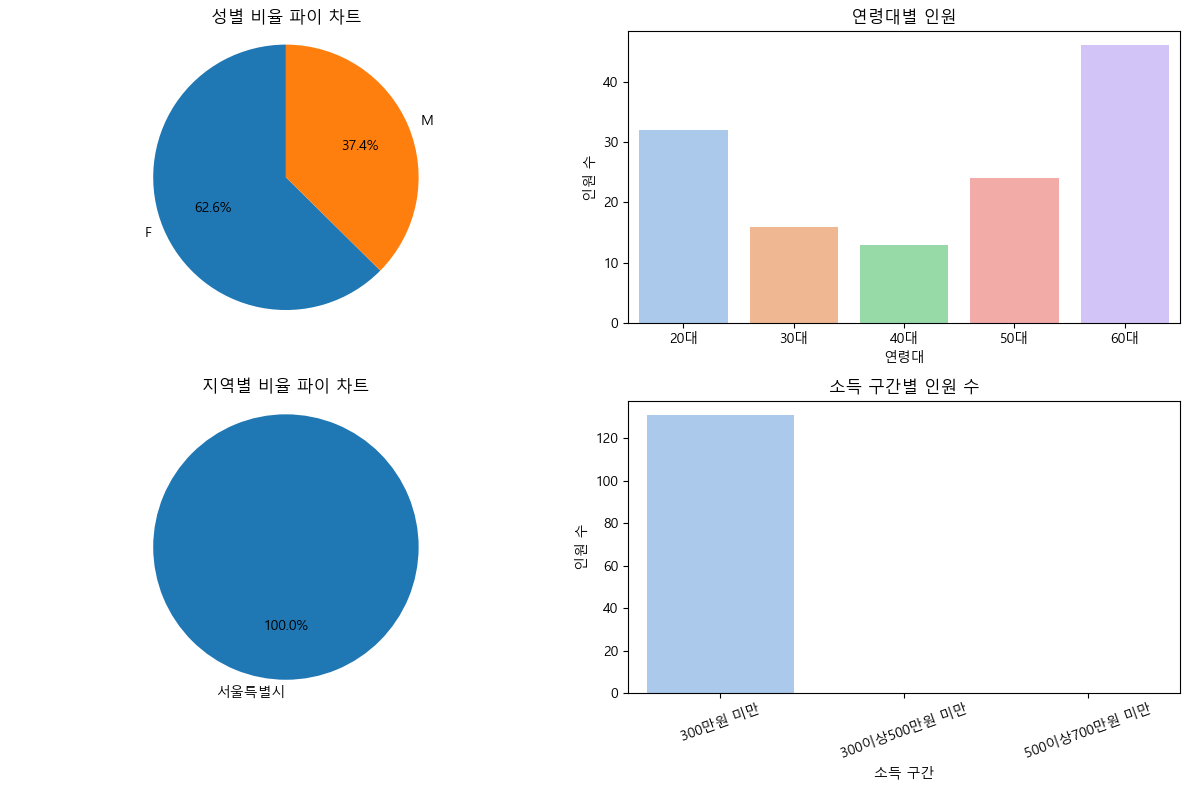

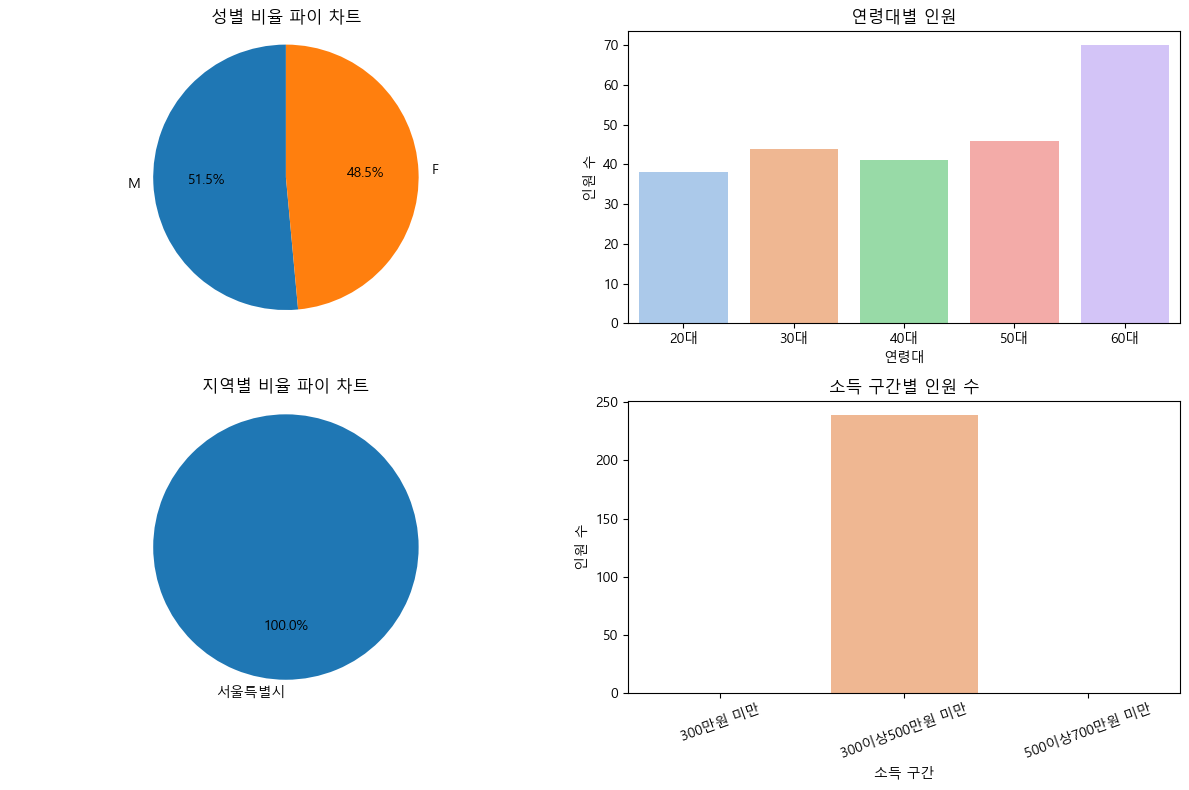

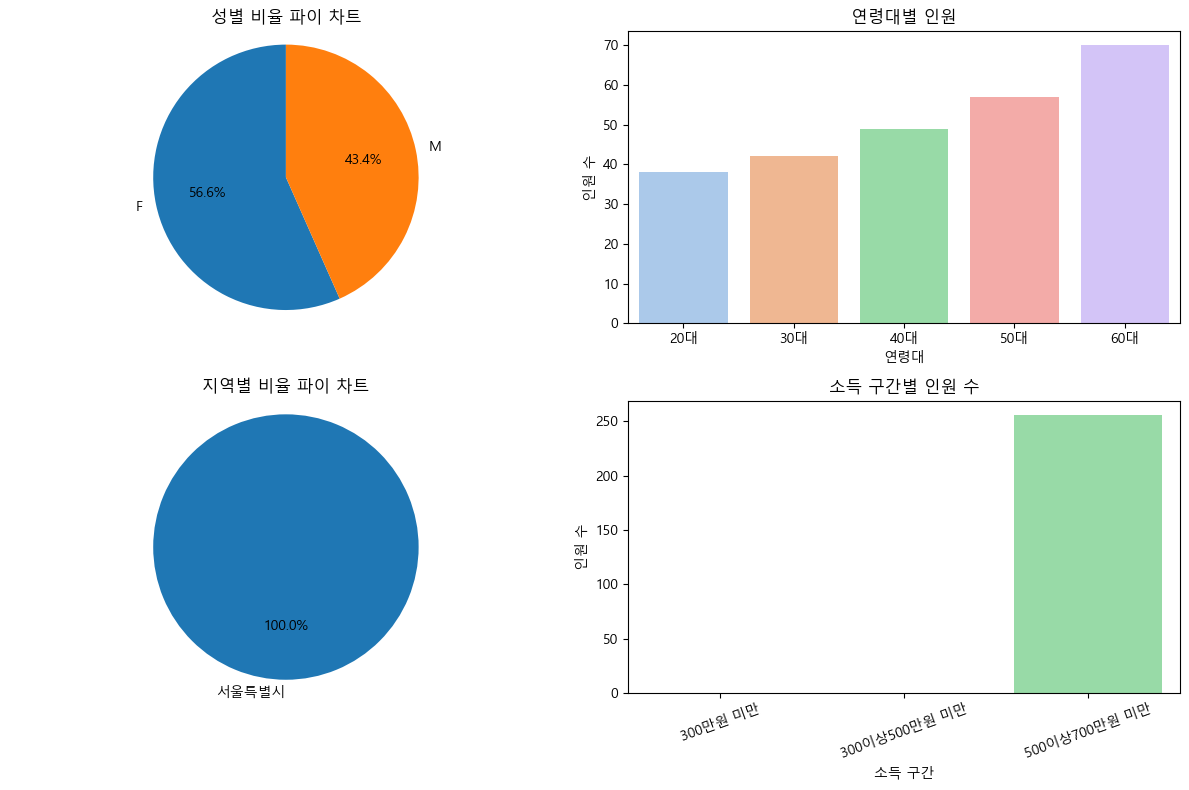

In [26]:
for INCOME in ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만']:
    # 0. 성별 지정
    grouped_df = info_df[info_df['INCOME']==f'{INCOME}']

    # 1. 성별 인원수 계산 (Pie Chart)
    sex_counts = grouped_df['SEX'].value_counts()
    sex_labels = sex_counts.index
    sex_sizes = sex_counts.values

    # 2. 연령대 인원수 계산 (Bar Plot)
    age_counts = grouped_df['AGE'].value_counts().sort_index()  # 정렬
    age_labels = age_counts.index
    age_sizes = age_counts.values

    # 3. 지역(AREA)별 인원수 계산 (Pie Chart)
    area_counts = grouped_df['AREA'].value_counts()
    area_labels = area_counts.index
    area_sizes = area_counts.values

    # 4. 소득(INCOME)별 인원수 (Countplot)
    # (sns.countplot은 따로 value_counts 안 해도 되지만, 정렬이 필요하면 .sort_index() 활용)
    # grouped_df['INCOME']이 카테고리형/문자형이라면 그대로 countplot 사용 가능

    # 2x2 subplot 생성
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # [0, 0] 성별 파이 차트
    axs[0, 0].pie(sex_sizes, labels=sex_labels, autopct='%.1f%%', startangle=90)
    axs[0, 0].axis('equal')
    axs[0, 0].set_title("성별 비율 파이 차트")

    # [0, 1] 연령대별 Bar Plot
    sns.barplot(x=age_labels, y=age_sizes, ax=axs[0, 1], palette='pastel')
    axs[0, 1].set_title("연령대별 인원")
    axs[0, 1].set_ylabel("인원 수")
    axs[0, 1].set_xlabel("연령대")

    # [1, 0] 지역별 파이 차트
    axs[1, 0].pie(area_sizes, labels=area_labels, autopct='%.1f%%', startangle=90)
    axs[1, 0].axis('equal')
    axs[1, 0].set_title("지역별 비율 파이 차트")

    # [1, 1] 소득구간 Countplot
    income_order = ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만']
    sns.countplot(x='INCOME', data=grouped_df, ax=axs[1, 1], palette='pastel', order = income_order)
    axs[1, 1].set_title("소득 구간별 인원 수")
    axs[1, 1].set_xlabel("소득 구간")
    axs[1, 1].set_ylabel("인원 수")
    axs[1, 1].tick_params(axis='x', rotation=20)

    # 자동 레이아웃 조정
    plt.tight_layout()
    plt.show();
